

***


** Project Title:SME hospitality business investment support utilising yelp and demographic data

***




# 1: Progress Report - Initial Investigation
## Part-1: Data source and domain description :
The small business enterprise domain has been facing many risks and challenges. There are very small survival rates of small hospitality businesses in London due to the high costs related. But on this study the focus is on identifying and possibly demystifying a common phrase: 

*" This is what make a successful restaurant: Location, Location, and Location"*.

**Analytical questions:**

* What are the most common demographics of people in each area and are they related to the quality of the restaurants in that area?

* What is the best strategy: a central area with high risk potential but high profit potential or a non central area with specific clientele?


**Objectives:**

* The aim of this study is to address those issues and find the optimum location suggestions in London in terms of costs and potential profits.


Yelp data were sourced from the API of Yelp and include business overview along with scoring and total reviews. The London data store provides demographic data along with business statistical information in London.


## Part-2: Analysis Strategy and Plans:

**1. Data wrangling:**

The data were downloaded utilizing an iterative algorithm from Yelp Api with the below algorithm.
Unfortunately yelp doesn’t allow to offset the response for more than 1000 data points thus it terminates.
In order to overcome the yelp restrictions on data download from their API the search algorithm had to be adjusted.
In order to divide London intro searchable chunks of data an geospatial method was utilized. London areas were downloaded as shapefiles from London Store:  https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

These were imported into ArcGis and an initial centroid of each shape/areas were calculated as WGS1984 Longitude and Latitude coordinates. Those centroids are calculated as the mean from each point on the shapefile.
Then each shape/areas was enclosed in a rectangle and the length and width was calculated. The database was then extracted and the diagonal and the radius of the rectangle was calculated utilizing the code below.

<img src="files/Progress Report/Picture1.png">

Then an iterative code is utilized to call yelp api and search according to the parameters calculated.

**2. Data Analysis:**

On this step the database of restaurant businesses in London along with other demographic datasets will be combined.
Datasets such as business survivability and population demographics will be utilized to check various correlations.
Correlations such as business survivability with population income per area will be examined. 

Then correlations such as average review scores or restaurants and number of reviews will be utilized as qualitative and quantitative variables for finding best locations for investing into hospitality business.

The tools that will be potentially used are Python, Tableau and ArcGIS.

***
***

## Part-3: Initial investigations on the data sources : 

The data that were extracted from the iterative algorithm were over 40k rows. After converting to a panda data frame so that we can modify those a total of 45k rows were found. (See cell 14 for the code and results). After removing the duplicates by utilizing the unique URL for each business a total of 14k restaurants were found. 

Next, the first two columns were dropped since those were unnecessary to the analysis. Then the completeness of the each variable was calculated. The Rating and review variables appear at 100% while price that will be utilized is at 63%. 

Finally, some descriptive statistics were calculated. For example the mean rating for restaurants in London is 3.5 stars out of 5 and an average rating count is 10.
***
***
# 2: Progress continuous - Work Diary : 

**Following the initial data wrangling process the following followed**

**1.Adding georeferences**
*Utilising ARC-GIS the data were spatially joined with the london areas shapefiles. This process required the conversion of the cartesian coordinates to the required national grid coordinate system since London Wards shapefile is on this system. After conversion the points and shapes were displayed on the same frame and was spatially joined on point to polygon process utilising the data management techniques. Arc-Gis tool was selected for this proccess due to the availiability and quick conversion and join tools. Same process was attempted on Python with GeoPandas but even installing those tools was challenging since the dependencies are not all availiable for Python.

*The proccess has created several junk columns which will be removed in the data wrangling process. This step was done in order to get the official area code id to utilise it as join unique ID with various London Data store databases.

<img src="files/Progress Report/Business Map.jpg">


**2.Data Wrangling**
*Apart from the initial wrangling above extensinve wrangling took place post data gathering. The initial database was in Json thus transforming this database into .csv to import in pandas has been a challenge. The pandas normalisation procedure has distributed certain nested json sections into multiple columns. For example the address has been seperated into multiple columns. Those multiple columns were concatenated into one column apart from zipcode wich will be used for data validation of the area. 

*Other data wrangling procedures that took place involved the dropping of columns from the two databases (Yelp and London Postcode Directory). In addition to dropping columns empty columns were also droped. For exaple data rows without an area mean that those will be located outside the polygon ward area and thus would not have been assigned an area code. Thus those businesses were droped. Other rows dropped were regarding for example no data on postcode or rating and reviews.

*Further data wrangling process has taken place on the category labels. These labels were nested from the json conversion and thus remained in one column. Some initial investigation on the row dat ahas revealed that the first nested column of alias and title is the main category of the data/restaurants. For example the restaurants are labeled according to the cuisine offering and the fastfoods as fastfoods. Thus those data were seperated by replacing and spliting characters to reach the desired two columns of Alias and Title. The main category label was reserved in case we need to dive deeper to the category of each restaurant.


# 2.1: Progress continuous - Analysis :
**1.**Calculate weighted average scoring for each area to have consistency across each area. Add also one London wide rating to sort areas. Also added one for the 33 boroughs.

**2.**Calculate the nearest restaurants average distance as a business classification.Update: the closest KDTree nearby algorithm was used. Extracted the nearest restaurants within a distance of 1km from each restaurant. This will be utilised as a business success rate. It will show probably the exclusivity of each reastaurant in an area.Calculated heactares to sq.km.

**3.**Calculate potential average cost of each business/area. Utilising hereditaments-retail by floor space and reting value of £.

**4.**Take a look of demographics. Potential PCA to find the most correlated demographics.Inserted the demographics and did the data wranlging before inserting to main database. Main data were focused on age-population-income. In order that data can be analysed. The restaurants dtabase will be grouped by area. One potential column will be the count of business total while the others will be average score ratings. 
<img src="files/Progress Report/Loac_map.jpg">


**Update** For the potential demographics another aproach was selected. The London output area classification was used. This was connected spatially on the clean db . The loac is comprised from smaller areas where census was analysed and categorised into general groups to the demographic characteristics. 

Currently two files were implemented. The analysis will take place for 2 geolocations. On a bourough and ward level. The Ward level appears the most appropriate since the initial db dowload and classification was based on the ward level.

Some initial analysis took place to investigate potential patternss. It seems that more affluent demographics are more active on yelp while other are not. Furthemore, the more affluent categories appear to have a preference towards specific cusisines while more urban demographics towards fast food. 
The initial investigation took place utilising V-Analytics and connecting two layers of shapefiles. One LOAC shapefile and a converted to WGS ccordinates shapefile with our database. For the conversions the QGIS tool wwas utilised due to the fact it is open source and many more tools that other availiable GIS software.

**5.**Potential categories as suggestions to the restaurant to open. The categories were seperated from the Json file and only the initial alias and tile was kept since it a categorisation genral classification.

**6.**Potentially find out the population per 1km in each borough and find out the potential clientele. 1km is the radius. So 2km should be the diameter to search. The London Data shapefile will be utilised for this excercise.

**Databases connected so far:**
https://data.london.gov.uk/dataset/business-demographics-and-survival-rates-borough - For business survival rate
https://data.london.gov.uk/dataset/london-area-classification - For demographics and look up values of boroughs LSOA etc.
https://data.london.gov.uk/dataset/london-borough-profiles - On seperate file with various census attributes
https://data.london.gov.uk/dataset/ward-profiles-and-atlas - On seperate file with characteristics
https://data.london.gov.uk/dataset/average-house-prices-ward-lsoa-msoa - Calculated average house prices change rate for the last 5 years.
https://data.cdrc.ac.uk/dataset/small-area-population-change-2011-14 - Small area population change. Insterted population of 2011 and 2014 and the change rate.
https://data.london.gov.uk/dataset/commercial-and-industrial-floorspace-borough - For floorspace value




## Part-4: Python code for initial investigations

In [ ]:
#This code dowload the Yelp db business rating, number of reviews and details.
#The method utilised was based on geospatial location since yelp restricts the total offset number and the location is inclomplete for some cases.
#Thus each London area was modifies on ArcGis and centroids were calculated.
#Then each shape/area was enclosed in a rectangle and the sides size were calculated.
#Then in another code we utilised pythagoreum to calculate diameter and radius of each search parameter/area.
#Then we used those centroids cartesian coordinates along with radius to search for the businesses on Yelp.

#Import the required libraries
import pandas as pd
import time
import requests
from pandas.io.json import json_normalize
%matplotlib inline
#Import csv file to export the data
final=pd.read_csv('final.csv')
#Import csv file with the centroids and radius to call
sp=pd.read_csv('Search.csv')
#This for loop loops through each London area and returns the Longtitude,Latitude and radius of each area
for index,row in sp.iterrows() :
    Lat=row.Lat
    Long=row.Long
    Radius=row.Radius
    i=-20
    check=pd.read_csv('check.csv')
#This while statement ensures that the offset parameter is below the limit specified by Yelp.
#If i counter goes above it will return error message
    while i<1000: 
        i+=20
#This statement is used to check if we get consecutive blank responses which means there are no more restaurants in the area.
#At the moment this allows 2 blank responses before it break the while loop.
#It checks the difference between response theoritical count to actual count.
        if i-len(check)>80:
            break
        else:
#These are the parameters and the link to call the yelp api
#The long,radius and lat parameters change for each area
            url = 'https://api.yelp.com/v3/businesses/search'
            headers = {'Authorization': 'Bearer ...'}
        #The download key was replaced with dots on the line above since Yelp forbids sharing the download key.
            params = {'term': 'restaurants',
                      'latitude': Lat,
                      'longitude': Long,
                      'radius': int(Radius),
                      'sort_by': 'rating',
                      'offset': i
                      }
#This is where the code send the request to yelp api.
            resp = requests.get(url=url, params=params, headers=headers)
            print(i)
#The server sends blank responses or error so this is where we examine the response and either continue or loop.
            try:
                tomove=json_normalize(resp.json()['businesses'])
            except (IndexError,KeyError,ValueError):
                continue
            pass
#Then the file is consolidated into final df after it is normalised from Json response to pandas df.     
            tomove=json_normalize(resp.json()['businesses'])
            check=pd.concat([check,tomove])
            final=pd.concat([final,tomove])
#Timedelay to keep the connection to Yelp live.
            time.sleep(1)
#Print statements to keep track of progress.
    print (row.NAME)
    print (len(final))
#Final export to csv file.
final.to_csv('final.csv')




In [ ]:
#Example yelp API response output received as json from the above code:
{
  "businesses": [
    {
      "distance": 204.04474242560002,
      "categories": [
        {
          "alias": "british",
          "title": "British"
        }
      ],
      "id": "monkey-puzzle-beefeater-grill-chessington-2",
      "coordinates": {
        "longitude": -0.314794,
        "latitude": 51.348614
      },
      "review_count": 3,
      "is_closed": false,
      "rating": 3.5,
      "price": "£££",
      "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/39Kc8B08MYy9CeG3uPN59A/o.jpg",
      "name": "Monkey Puzzle - Beefeater Grill",
      "url": "https://www.yelp.com/biz/monkey-puzzle-beefeater-grill-chessington-2?adjust_creative=xH5CGfNd6xR3i93Wy2f1NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xH5CGfNd6xR3i93Wy2f1NQ",
      "phone": "+441372744060",
      "location": {
        "country": "GB",
        "address3": "",
        "address2": "",
        "zip_code": "KT9 2NE",
        "state": "XGL",
        "city": "Chessington",
        "address1": "Leatherhead Road"
      }
    },
    {
      "distance": 3020.064269504,
      "categories": [
        {
          "alias": "indpak",
          "title": "Indian"
        }
      ],
      "id": "saffron-summer-chessington",
      "coordinates": {
        "longitude": -0.303641147911549,
        "latitude": 51.3746150604097
      },
      "review_count": 2,
      "is_closed": false,
      "rating": 4.5,
      "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/s2rJPBd0W5vCMbPfAu6UUg/o.jpg",
      "name": "Saffron Summer",
      "url": "https://www.yelp.com/biz/saffron-summer-chessington?adjust_creative=xH5CGfNd6xR3i93Wy2f1NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xH5CGfNd6xR3i93Wy2f1NQ",
      "phone": "+442083914477",
      "location": {
        "country": "GB",
        "address3": null,
        "address2": "Hook Road",
        "zip_code": "KT9 1DR",
        "state": "SRY",
        "city": "Chessington",
        "address1": "4 Ace Parade"
      }
    }
  ],
  "total": 34
}

In [8]:
#Display the final output of the exract from json to panda df:
restaurants=pd.read_csv('final.csv')
display(restaurants.head())

,Unnamed: 0,Unnamed: 0.1,categories,coordinates.latitude,coordinates.longitude,distance,id,image_url,is_closed,location.address1,...,location.city,location.country,location.state,location.zip_code,name,phone,price,rating,review_count,url
0,0,NaN,"[{'alias': 'historicaltours', 'title': 'Histor...",51.493152,-0.146384,19813.680700,golden-tours-london-2,https://s3-media2.fl.yelpcdn.com/bphoto/bjPk5r...,False,4 Fountain Square,...,London,GB,XGL,SW1W 9SH,Golden Tours,4.420720e+11,NaN,2.5,101,https://www.yelp.com/biz/golden-tours-london-2...
1,1,NaN,"[{'alias': 'indpak', 'title': 'Indian'}]",51.374615,-0.303641,3020.064270,saffron-summer-chessington,https://s3-media2.fl.yelpcdn.com/bphoto/s2rJPB...,False,4 Ace Parade,...,Chessington,GB,SRY,KT9 1DR,Saffron Summer,4.420840e+11,NaN,4.5,2,https://www.yelp.com/biz/saffron-summer-chessi...
2,2,NaN,"[{'alias': 'indpak', 'title': 'Indian'}]",51.310281,-0.298107,4300.745498,joy-ashtead-ashtead,https://s3-media4.fl.yelpcdn.com/bphoto/_-U2QV...,False,61AThe Street,...,Ashtead,GB,SRY,KT21 1AA,Joy Ashtead,4.413720e+11,NaN,4.5,2,https://www.yelp.com/biz/joy-ashtead-ashtead?a...
3,3,NaN,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",51.316812,-0.304217,3506.601226,mogul-dynasty-ashtead,https://s3-media4.fl.yelpcdn.com/bphoto/SYwz9M...,False,1 Craddocks Parade,...,Ashtead,GB,SRY,KT21 1QL,Mogul Dynasty,4.413720e+11,??,4.5,4,https://www.yelp.com/biz/mogul-dynasty-ashtead...
4,4,NaN,"[{'alias': 'diners', 'title': 'Diners'}]",51.310200,-0.300592,4275.387611,superfish-ashtead-surrey-ashtead,https://s3-media2.fl.yelpcdn.com/bphoto/gNN3V7...,False,2 Woodfield Lane,...,Ashtead,GB,SRY,KT21 2BG,Superfish Ashtead Surrey,4.413720e+11,??,3.0,4,https://www.yelp.com/biz/superfish-ashtead-sur...


In [ ]:
#This code calculates the radius required utilising pythagoreum theorem.
#The centroids and the
#Import the required libraries
import pandas as pd
import numpy as np
#Read the database with Pandas
London_Wards=pd.read_csv('London_Wards.csv')
#Calculate square of length and width of each rectangle
sq_length=London_Wards['Length']**2
sq_width=London_Wards['Width']**2
#Calculate sum of squares
sum=sq_length+sq_width
#Calculate the diameter of each rectangle with pythagorian theorem
diameter=sum.apply(np.sqrt)
#Calculate radius for search parameter
radius=diameter/2
#Add to London_Wards df
London_Wards['Diameter']=diameter
London_Wards['Radius']=radius
#Export to csv file
London_Wards.to_csv('Search.csv')

In [7]:
#Search parameters results after euclidean calculations that will be utilised on the search algorithm on the top cell:
import pandas as pd
from IPython.display import display, HTML
search=pd.read_csv('Search.csv')
display(search.head())

,Unnamed: 0,ORIG_FID,OBJECTID *,NAME,BOROUGH,Long,Lat,Length,Width,Diameter,Radius
0,57,57,58,Chislehurst,Bromley,0.074292,51.413093,5185.785850,3180.311784,6083.318003,3042
1,58,58,59,Mottingham and Chislehurst North,Bromley,0.041592,51.432307,3214.905141,1182.175015,3425.369007,1713
2,59,59,60,Orpington,Bromley,0.109417,51.371321,2349.880482,2269.889626,3267.160418,1634
3,60,60,61,Cray Valley West,Bromley,0.102653,51.400349,3556.168188,2054.446892,4106.955589,2053
4,61,61,62,Cray Valley East,Bromley,0.131661,51.391668,4575.797397,4430.149927,6368.999152,3184


In [6]:
#Initial investigation on the data downloaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
warnings.filterwarnings("ignore")
#Import the final downlod file
df=pd.read_csv('final.csv')
#Print the total shape
print(df.shape)
#Drop the duplicates to a clean dataframe based on unique urls
clean_db=df.drop_duplicates('url')
#Print the total rows of the clean dataframe
print(clean_db.shape)
print('---------------------------------------------------------------------------')
#Print the total empty rows
print(clean_db.isnull().sum())
print('---------------------------------------------------------------------------')
#List the columns in order to find unwanted index columns
col=list(clean_db.columns.values)
print(col)
print('---------------------------------------------------------------------------')
#Drop the first indexed columns
clean_db.drop(clean_db.columns[[0,1]],axis=1,inplace=True)
#Calculate the proportion of empty rows to total rows
proportion_of_col=(clean_db.count()/len(clean_db.index))*100
print(proportion_of_col)
print('---------------------------------------------------------------------------')
print(clean_db['rating'].describe())
print('              ')
print(clean_db['review_count'].describe())

(45752, 22)
(14040, 22)
---------------------------------------------------------------------------
Unnamed: 0                   0
Unnamed: 0.1             14040
categories                   0
coordinates.latitude        10
coordinates.longitude       10
distance                     0
id                           0
image_url                 3985
is_closed                    0
location.address1           98
location.address2         9732
location.address3        13628
location.city                3
location.country             0
location.state               0
location.zip_code           33
name                         0
phone                     1197
price                     5123
rating                       0
review_count                 0
url                          0
dtype: int64
---------------------------------------------------------------------------
['Unnamed: 0', 'Unnamed: 0.1', 'categories', 'coordinates.latitude', 'coordinates.longitude', 'distance', 'id', 'image_url', 'is_

#  Final Project Additions :

**1. Abstract:**

Technology is an integral part of everyone these days. Data on rating websites, such as Yelp,  is increasing exponentially. In this paper the utilisation of services such as Yelp will be examined on how it can be utilised as business decision support tool. We introduce various variables such London and Business demographics along with derived variables to discover important factors affection business investment decisions.

**2	Research project objectives**
This study aims to address the problems of new business owners when they are faced with investment decisions of location selections. The most common perception is that location is the most influential factor on this decision. But location selection in a metropolis such as London could carry significant risks. For example selecting a central location could carry more risk than other areas in outer London.
In order to select an appropriate location there are several variables that need to be considered. 
In this study we are going to examine the following questions in order to find significant variables that affect business decisions of this type:

➢	Why this location is more optimum that other locations?
➢	What are the demographics of these locations?
➢	What is the best strategy: a central area with high risk potential but high profit potential or a non-central area with specific clientele?


---------------------------------------------------------------------------


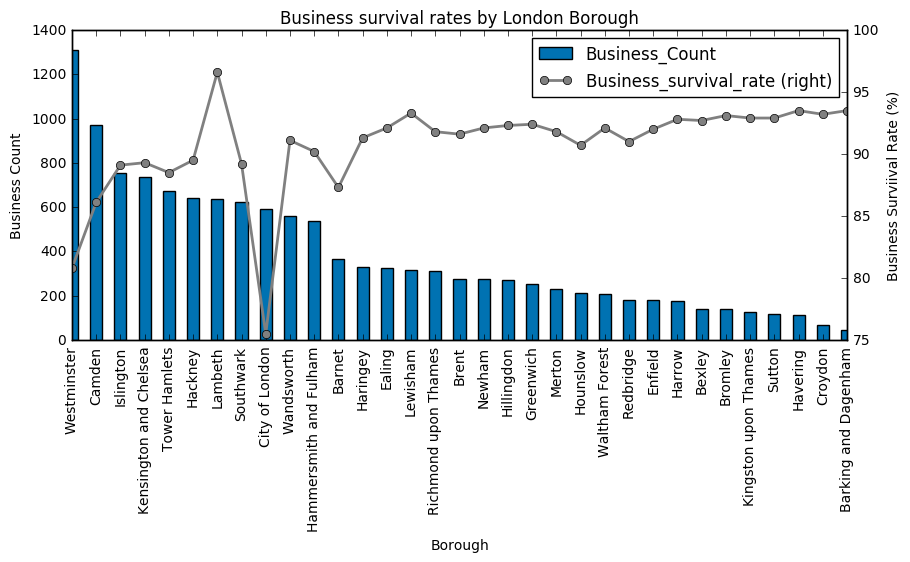

In [3]:
#Initial investigation on the data downloaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
#Load mixed LOAC database
df=pd.read_csv('by_LOAC.csv')
#Convert the data types to numberic
df[['Rating','Review_Cou','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']]=df[['Rating','Review_Cou','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']].apply(pd.to_numeric)
print('---------------------------------------------------------------------------')
# Barchart for survival rates and business count
bar=df[['Borough']]
bar=bar.groupby(['Borough'])['Borough'].count()
bar.name='Business_Count'
bar2=df[['Borough','Business_survival_rate']]
bar2=bar2.drop_duplicates()
bar2.index=bar2['Borough']
bar2=bar2.join(bar)
bar2=bar2.sort(columns='Business_Count',axis=0,ascending=False)
ax=bar2[['Borough','Business_Count']].plot.bar(x='Borough',title="Business survival rates by London Borough",legend=True,figsize=(10, 4),rot=90)
ax.set_ylabel("Business Count")
ax2=bar2[['Business_survival_rate']].plot.line(figsize=(10, 4),secondary_y=True,rot=90,color='Grey',ax=ax,linewidth=2,marker='o')
ax2.set_ylabel("Business Surviival Rate (%)")
plt.style.use('seaborn-colorblind')
plt.show()

**3. Data Addition and Data Derivation**

As described on the initial sections several databases were chosen to be added to the initial Yelp database. Those additions serve the purpose of variables that will explain Yelp data such business ratings and review counts. Other potential outcomes from this analysis could be the restaurant preference of various demographic groups.

For this demographic analysis the London Output Area Classification. The LOAC is a demographic tools based on the OAC classification census used in 2011. In this study 60 variables were used to create clustered grouped classifications. It has also been further clustered those classifications and summarised them into 8 demographic super groups. 

Additional, databases utilised were business demographic databases as shown in (Figure 1). These database hold data for business survival rates for each year. Those rates are calculated as the business births and deaths each year for each borough. (Figure 1) shows also the total number of businesses/restaurants that were scraped from yelp. Some initial observations from that chart can be drawn. For example businesses in Central London, such a City of London and Westminster accumulate larger number of restaurants registered with Yelp. In addition, those areas seem to have lower survival rates that other areas located outside city centre such as Richmond upon Thames.

In order to expand the factors research on business demographics the business floor space rateable value was added. This dataset provides rateable value of the commercial floor space for each borough in London.  Furthermore, the 5 year change were calculated in order to reveal and upwards and downwards trends. 


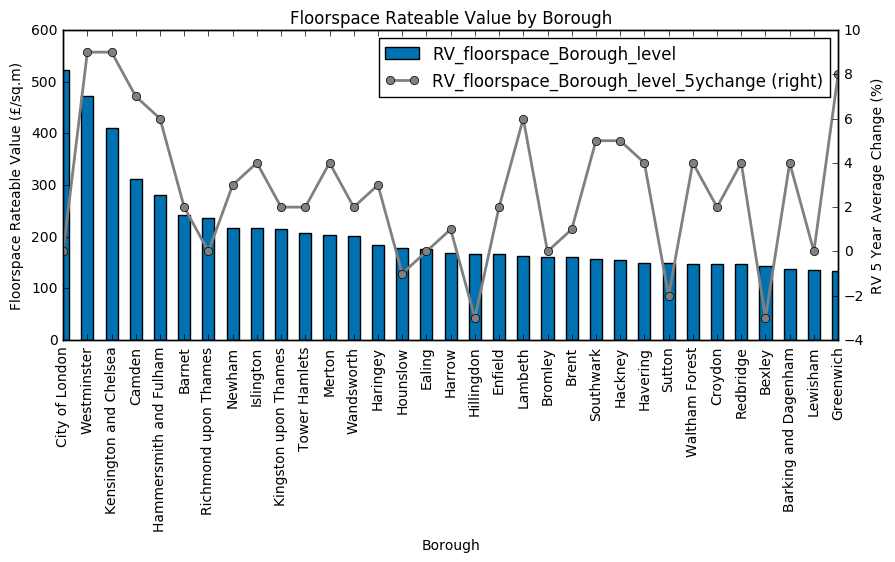

In [4]:
warnings.filterwarnings("ignore")
floor=df[['Borough','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level']]
floor['RV_floorspace_Borough_level_5ychange']=floor['RV_floorspace_Borough_level_5ychange']*100
floor=floor.groupby(['Borough'])['RV_floorspace_Borough_level','RV_floorspace_Borough_level_5ychange'].mean()
floor=floor.sort(columns='RV_floorspace_Borough_level',axis=0,ascending=False)
floor['Borough']=floor.index
ax=floor[['Borough','RV_floorspace_Borough_level']].plot.bar(x='Borough',title="Floorspace Rateable Value by Borough",legend=True,figsize=(10, 4),rot=90)
ax.set_ylabel("Floorspace Rateable Value (£/sq.m)")
ax2=floor[['RV_floorspace_Borough_level_5ychange']].plot.line(figsize=(10, 4),secondary_y=True,rot=90,color='Grey',ax=ax,linewidth=2,marker='o')
ax2.set_ylabel("RV 5 Year Average Change (%)")
plt.style.use('seaborn-colorblind')
plt.show()

**3.1 Competition analysis with nearest neighboors**

To assess the correlation of competition of restaurants additional data were required. Data such as population density by LOAC were inserted into the database. Moreover, one measure that could be potentially useful is the count of nearby restaurants. These data could potentially serve as an indicator of local competition within the vicinity of a restaurant. Combined with population density within 1km for each LOAC, Ward, Borough, it could provide valuable insight. 

For this the nearest neighbour method was utilised in order to count nearby businesses in a radius of 1km. The Spatial Sci-Py pachage - KDtree was used for this purpose.  The count of nearby businesses were calculated within 1km radius.  More central areas appear to have more competition across all ratings while there is less completion on non-central areas.  There is also some correlation between rating and nearby count of businesses. 

The competition is higher in areas with restaurants with higher ratings. On the other hand, in the population density appear as inverse to count of businesses. Areas with higher population density per square kilometre are outside central London areas. The ratings of restaurant businesses like those appear to have been rated lower than less populated areas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as sp
points=[]
clean_db=pd.read_csv('clean_db.csv')
for i,val in enumerate(clean_db.index):
    point=np.column_stack((clean_db.Longtitude[i],clean_db.Latitude[i]))
    points.append(point)
kdtrees=[sp.cKDTree(p) for p in points]
r = 0.01
points_within_r = np.zeros((len(kdtrees), len(kdtrees)), dtype=np.int)
for j in range(len(kdtrees)):
    for k in range(j+1, len(kdtrees)):
        points_within_r[j, k] = kdtrees[j].count_neighbors(kdtrees[k], r, 2)
        print (points_within_r[j, k])
points_within_r = points_within_r + points_within_r.T
test=points_within_r.sum(axis=0)
df=pd.DataFrame(data=test)
df.columns=['Nearby_Business_Count']
clean_db=clean_db.join(df)

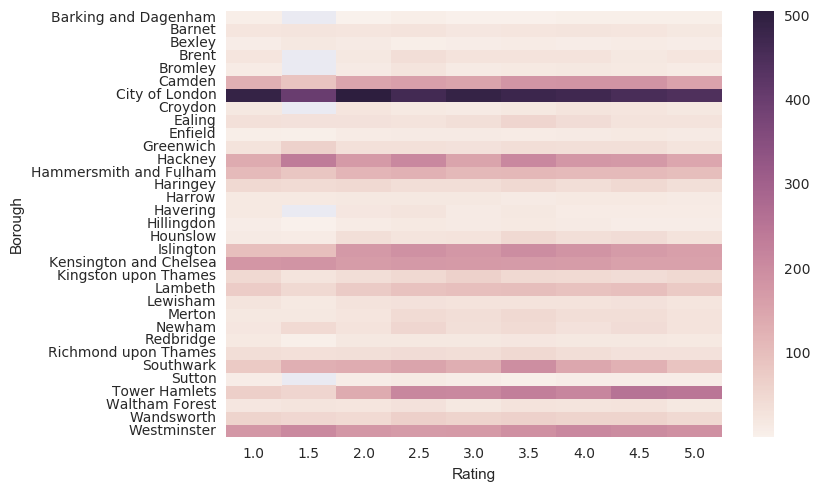

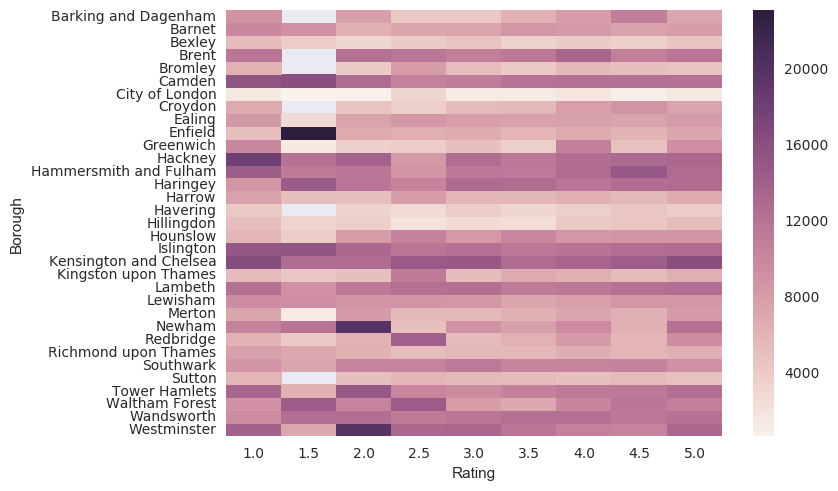

In [19]:
#Initial investigation on the data downloaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from wordcloud import WordCloud
#Load mixed LOAC database
df=pd.read_csv('by_LOAC.csv')
#Convert the data types to numberic
df[['Rating','Review_Cou','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']]=df[['Rating','Review_Cou','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']].apply(pd.to_numeric)
data=df[['Borough','Rating','Nearby_Bus']]
data=data.groupby(['Borough','Rating'],as_index=False)['Nearby_Bus'].mean()
data['Nearby_Bus']=data['Nearby_Bus'].round()
data['Nearby_Bus']=data['Nearby_Bus'].astype(int)
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
map_tree = data.pivot("Borough", "Rating", "Nearby_Bus")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(map_tree, annot=False,annot_kws={"size": 7})
plt.show()

# Pop density in sq.km heatmap with seaborn
data=df[['Borough','Rating','loac_POPDEN_sqkm']]
data=data.groupby(['Borough','Rating'],as_index=False)['loac_POPDEN_sqkm'].mean()
data['population_density_sqkm_borough']=data['loac_POPDEN_sqkm'].round()
data['population_density_sqkm_borough']=data['loac_POPDEN_sqkm'].astype(int)
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
map_tree = data.pivot("Borough", "Rating", "loac_POPDEN_sqkm")
# Draw a heatmap with the numeric values in each cell
sns.heatmap(map_tree, annot=False,annot_kws={"size": 7})
plt.show()

**4. Data modelling-analysis**

In this section the correlations of the variables were examined to confirm various assumptions that were discovered on earlier observations during visual analysis step. The yelp data frame was combined with the required variables to be examined and an initial correlation test was conducted. 

Correlated variables appear to confirm some initial assumptions. There is strong correlation of rateable floor space value and business survival rates. Other observations noticeable are median house prices with floor space value and also with nearby business count. 

Furthermore, The Business survival rate is also strongly correlated with nearby business count. The business survival variable appears to be correlated with several variables relating to increase in cost and completion. 
In order to get a better understanding of the variables involved a principal components analysis was conducted. 
To conduct the PCA analysis the data were scaled with the use of Sci-Kit package.

Observations made earlier on the correlation matrix appear to be confirmed by the PCA analysis as well. The loading of floor space value and business survival rates are significant along with median house prices and LOAC population. On the second component the loadings related to population of London area classification are the most significant. 


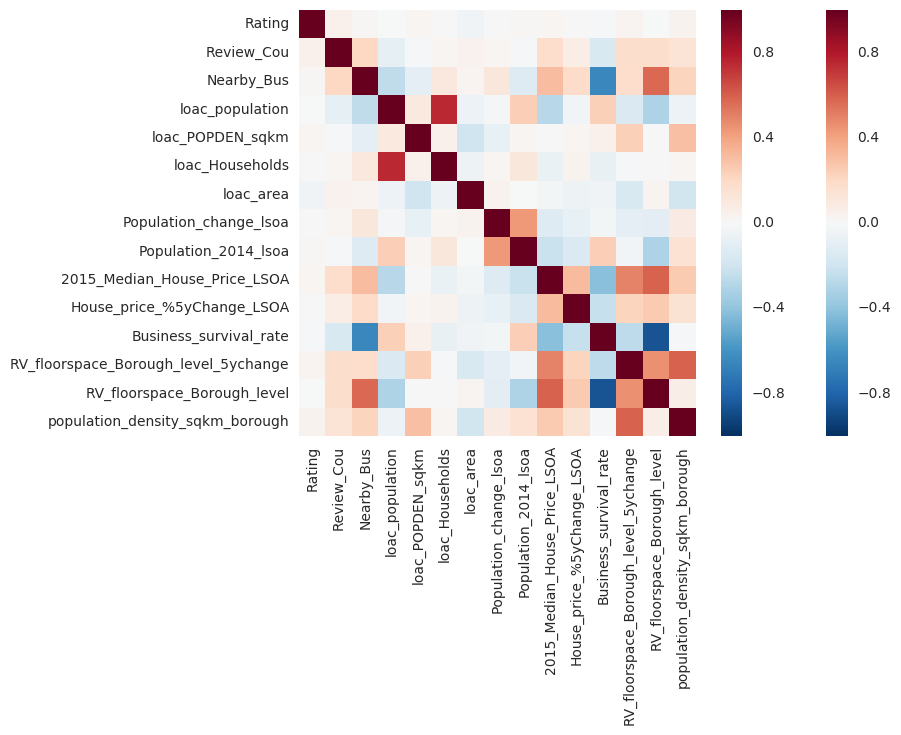

In [17]:
data=df[['Rating','Review_Cou','Nearby_Bus','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']]
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

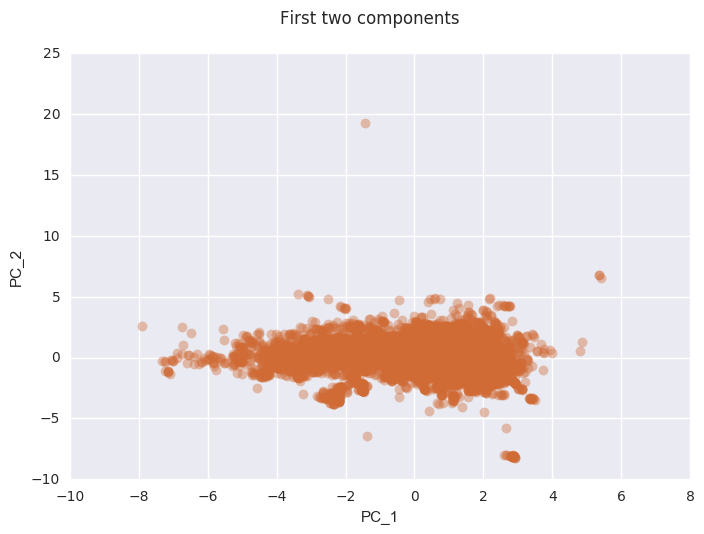

First component: 
Column " RV_floorspace_Borough_level " has a loading of:  -0.482130621705
Column " 2015_Median_House_Price_LSOA " has a loading of:  -0.434577888783
Column " Business_survival_rate " has a loading of:  0.408406503568
Column " RV_floorspace_Borough_level_5ychange " has a loading of:  -0.376216662585
Column " loac_population " has a loading of:  0.264469807725
Column " House_price_%5yChange_LSOA " has a loading of:  -0.24402868678
Column " Population_2014_lsoa " has a loading of:  0.222538236852
Column " population_density_sqkm_borough " has a loading of:  -0.195774619387
Column " Review_Cou " has a loading of:  -0.167460299871
---------------------------------------------------------------------------
Second component: 
Column " population_density_sqkm_borough " has a loading of:  0.459460877732
Column " loac_population " has a loading of:  0.405064284907
Column " loac_Households " has a loading of:  0.402896315565
Column " loac_POPDEN_sqkm " has a loading of:  0.36936

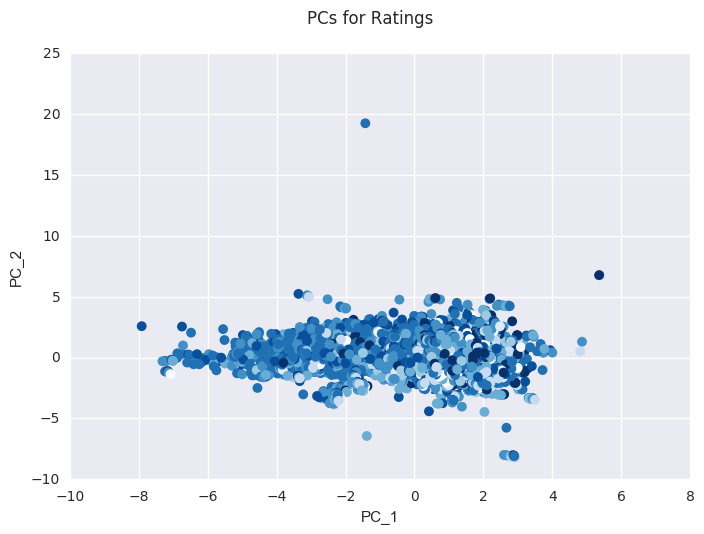

In [23]:
df2=df[['Rating','Review_Cou','loac_population','loac_POPDEN_sqkm','loac_Households','loac_area','Population_change_lsoa','Population_2014_lsoa','2015_Median_House_Price_LSOA','House_price_%5yChange_LSOA','Business_survival_rate','RV_floorspace_Borough_level_5ychange','RV_floorspace_Borough_level','population_density_sqkm_borough']]
#PCA Testings
#scale the feature for PCA
numberOfColumnsToLook = 9
columns=df2.columns
scaled = preprocessing.StandardScaler().fit_transform(df2)
scaled = pd.DataFrame(scaled, columns=df2.columns)
#PCA
pca = PCA(n_components=2)
pca.fit(scaled)
PCA(copy=True, n_components=2, whiten=False)
axes = pca.transform(scaled)
scaled.shape
axes.shape
#Plot results of PCA
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(axes[:,0], axes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth='0')
plt.show()
#Print Components
#######Fist Component
columns=np.asarray(df2.columns.values)
#print( pca.components_)
comp1Loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:numberOfColumnsToLook]
comp1Names = np.asarray(columns)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:17]
print ("First component: ")
for i in range(0, numberOfColumnsToLook):
    print ( "Column \"" , comp1Names[i] , "\" has a loading of: ", comp1Loadings[i])
print('---------------------------------------------------------------------------')
#######Second Component
comp2Loadings = np.asarray(pca.components_[1])[np.argsort( np.abs(pca.components_[1]))[::-1]][0:numberOfColumnsToLook]
comp2Names = np.asarray(columns)[np.argsort( np.abs(pca.components_[1]))[::-1]][0:numberOfColumnsToLook]
print ("Second component: ")
for i in range(0, numberOfColumnsToLook):
    print ( "Column \"" , comp2Names[i] , "\" has a loading of: ", comp2Loadings[i])
print('---------------------------------------------------------------------------')
#Ploting the values
rating = np.asarray(scaled[['Rating']], 'f')
plt.figure(2)
plt.suptitle('PCs for Ratings')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(axes[:,0], axes[:,1], c = rating, cmap = plt.cm.Blues, s = 50, linewidth='0')
plt.show()
